### Cleaning and preprocessing the data for NLP analysis
Dataset: Tweets_2020_11-March-23-June_workfromhome_all.csv => 30232 records

In [129]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import csv
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import os
from sentistrength import PySentiStr
import calendar
import wordcloud
import ast

##### Import the 2020 raw dataset

In [3]:
raw_dataset = pd.read_csv('Tweets_2020_11-March-23-June_workfromhome_all.csv')
print(raw_dataset.shape)
raw_dataset.head()

(30232, 18)


,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Tweet_Time,Tweet_Content,Tweet_Image_URL,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Retweet_or_not,Retweet_Original_Tweet_Content,Retweet_Original_Tweet_Poster,Retweet_Original_Tweet_Time,Retweet_Original_Tweet_PosterID
0,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/TheWritingFitz/status/1237...,NaN,https://twitter.com/TheWritingFitz,1.580000e+12,11-03-20 00:14,@CWAUnion\n Is the union able to take measures...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/digitalkg/status/123753446...,NaN,https://twitter.com/digitalkg,1.580000e+12,11-03-20 00:23,I’m looking forward to working from home a lot...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/LukeZhang5/status/12375345...,NaN,https://twitter.com/LukeZhang5,1.580000e+12,11-03-20 00:23,China team work from home more than 1 month al...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/Adamhill1212/status/123753...,NaN,https://twitter.com/Adamhill1212,1.580000e+12,11-03-20 00:39,We are about to find out how much work could h...,NaN,363,28,14,No,NaN,NaN,NaN,NaN
4,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/kennethdashen/status/12375...,@kennethdashen,https://twitter.com/kennethdashen,1.580000e+12,11-03-20 00:45,Folks who can't #WorkFromHome probably hate th...,NaN,1,NaN,NaN,No,NaN,NaN,NaN,NaN


In [4]:
# Populate the Author_Name column

raw_dataset['Author_Name'] = raw_dataset['Author_Web_Page_URL'].apply(lambda x: '@' + re.findall(r'https://twitter.com/(\w+)', x)[0])

In [5]:
# Check how many unique values are in each column of the dataset
raw_dataset.nunique()

Category                               5
Keyword                              114
Web_Page_URL                         219
Tweet_Website                      30158
Author_Name                        24991
Author_Web_Page_URL                24991
Tweet_Timestamp                        2
Tweet_Time                         23023
Tweet_Content                      30231
Tweet_Image_URL                      257
Tweet_Number_of_Likes                455
Tweet_Number_of_Retweets             187
Tweet_Number_of_Reviews              107
Retweet_or_not                         2
Retweet_Original_Tweet_Content         4
Retweet_Original_Tweet_Poster          4
Retweet_Original_Tweet_Time            3
Retweet_Original_Tweet_PosterID        4
dtype: int64

Check how many NaN values are in each column of the dataset and their percentage

In [6]:
print("Missing values percentage: \n")

# Calculate the maximum length of the column names
coloane = raw_dataset.columns.to_list()
max_col_len = max([len(str(col)) for col in coloane])

# Define the formatting string with a dynamic width for the column name field
fmt_str = '{:<{}}  {:>5}  {:.4f}%'

# Iterate over the columns and print the missing values percentage for each one
for c in coloane:
    if c != 'tconst':
        num_missing = len(raw_dataset[raw_dataset[c].isna()])
        percent_missing = num_missing / len(raw_dataset) * 100
        print(fmt_str.format(c, max_col_len, num_missing, percent_missing))
    else:
        num_missing = len(raw_dataset[raw_dataset[c].isna()])
        percent_missing = num_missing / len(raw_dataset) * 100
        print(fmt_str.format(c, max_col_len + 8, num_missing, percent_missing))

Missing values percentage: 

Category                             0  0.0000%
Keyword                              0  0.0000%
Web_Page_URL                         0  0.0000%
Tweet_Website                        0  0.0000%
Author_Name                          0  0.0000%
Author_Web_Page_URL                  0  0.0000%
Tweet_Timestamp                   1079  3.5691%
Tweet_Time                           0  0.0000%
Tweet_Content                        1  0.0033%
Tweet_Image_URL                  29958  99.0937%
Tweet_Number_of_Likes            10515  34.7810%
Tweet_Number_of_Retweets         20928  69.2247%
Tweet_Number_of_Reviews          19321  63.9091%
Retweet_or_not                    1079  3.5691%
Retweet_Original_Tweet_Content   30228  99.9868%
Retweet_Original_Tweet_Poster    30228  99.9868%
Retweet_Original_Tweet_Time      30228  99.9868%
Retweet_Original_Tweet_PosterID  30228  99.9868%


In [7]:
# Drop the unnecessary columns from the dataset
raw_dataset.drop(['Category','Tweet_Timestamp','Tweet_Image_URL','Retweet_or_not','Retweet_Original_Tweet_Content', 'Retweet_Original_Tweet_Poster', 'Retweet_Original_Tweet_Time', 'Retweet_Original_Tweet_PosterID'], 
                     axis=1, inplace=True)

In [8]:
# Replace NaN values with zeros for Tweet Number of Likes, Retweets and Reviews
raw_dataset[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]] = raw_dataset[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]].fillna(0)
raw_dataset.head()

,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Time,Tweet_Content,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/TheWritingFitz/status/1237...,@TheWritingFitz,https://twitter.com/TheWritingFitz,11-03-20 00:14,@CWAUnion\n Is the union able to take measures...,0,0,0
1,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/digitalkg/status/123753446...,@digitalkg,https://twitter.com/digitalkg,11-03-20 00:23,I’m looking forward to working from home a lot...,0,0,0
2,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/LukeZhang5/status/12375345...,@LukeZhang5,https://twitter.com/LukeZhang5,11-03-20 00:23,China team work from home more than 1 month al...,0,0,0
3,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/Adamhill1212/status/123753...,@Adamhill1212,https://twitter.com/Adamhill1212,11-03-20 00:39,We are about to find out how much work could h...,363,28,14
4,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/kennethdashen/status/12375...,@kennethdashen,https://twitter.com/kennethdashen,11-03-20 00:45,Folks who can't #WorkFromHome probably hate th...,1,0,0


In [9]:
# Check the datatypes of the columns
raw_dataset.dtypes

Keyword                     object
Web_Page_URL                object
Tweet_Website               object
Author_Name                 object
Author_Web_Page_URL         object
Tweet_Time                  object
Tweet_Content               object
Tweet_Number_of_Likes       object
Tweet_Number_of_Retweets    object
Tweet_Number_of_Reviews     object
dtype: object

In [10]:
def process_string(value):
    value = value.replace(",", '')
    value = value.replace('.', '')
    value = value.replace('K', '00')

    return value

In [11]:
raw_dataset['Tweet_Number_of_Likes'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Likes'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
raw_dataset['Tweet_Number_of_Retweets'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Retweets'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
raw_dataset['Tweet_Number_of_Reviews'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Reviews'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')

In [12]:
raw_dataset['Tweet_Time'] = pd.to_datetime(raw_dataset['Tweet_Time'], format='%d-%m-%y %H:%M')

### Functions to preprocess the Tweets for sentiment analysis

In [13]:
def custom_stop_words(path_to_stopwords):
    """Function to read a .txt file containing (custom) stop words and return a set of these stop words.
    Args:
        path_to_stopwords (str): path to the.txt file containing stop words (e.g. /your/path/to/files/stop_words.txt)
    Returns:
        set: set of stop words
    """    
    stop_words = set()
    with open(path_to_stopwords, 'r') as f:
        for line in f:
            word = line.strip()  # remove whitespace and newline characters
            stop_words.add(word)
    return stop_words


def remove_emoji(text):
    """Function that takes a text string as input and uses a regular expression pattern to match all Unicode characters
    that are classified as emojis. The regular expression includes different ranges of Unicode characters 
    that represent different types of emojis, such as emoticons, symbols, and flags.
    Args:
        text (str): text string to remove emojis from
    Returns:
        str: text string with all emojis removed
    """    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


def remove_stopwords(text, stop_words):
    """Function that removes stop words from a given text.
    Args:
        text (str): text string
        stop_words (set): set of stop words
    Returns:
        str: text string without stop words
    """    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove the stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text


def clean_text(text, stop_words):
    """Function to clean the raw text, e.g. from a tweet. Performs the following steps:
    1. Lowercase all the words in the text
    2. Replace all new line characters with a white space
    3. Remove tags
    4. Remove URLs
    5. Convert contractions to their full forms
    6. Remove punctuations
    7. Remove emojis (emoticons, symbols, flags, etc.)
    8. Remove stopwords
    Args:
        text (str): text string to be cleaned before passing it to the sentiment analysis model
        stop_words (set): set of stop words to be removed from the text
    Returns:
        str: cleaned text string
    """        

    if type(text) != str:
        return ''

    # 1. Lowercase all words in the text
    text = text.lower()

    # 2. Replace the new line character with empty string
    text = text.replace("\n", " ")

    # 3. Remove contractions, such as you're => you are
    contractions.fix(text)
    
    # 4. Remove words starting with '@' - tags (most common noise in replies)
    text = re.sub(r'@\w+', '', text, flags=re.MULTILINE)

    # 5. Remove words starting with 'http' - hyperlinks
    text = re.sub(r'http\S+|www.\S+', '', text, flags=re.MULTILINE)

    # 6. Remove punctuation from the text using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # 7. Remove emojis
    text = remove_emoji(text)

    # 8. Remove stopwords in English
    text = remove_stopwords(text, stop_words)

    return text

#### Populating the set of stop words from the text file

In [14]:
# Getting the path to the root directory of the filesystem
root_dir = os.getcwd()

In [15]:
stopwords = custom_stop_words(os.path.join(root_dir,'stopwords.txt'))
stopwords

{'an',
 'and',
 'at',
 'being',
 'had',
 'it',
 'its',
 'o',
 'of',
 'or',
 'so',
 'the',
 'to',
 'which',
 'y'}

### Setup for SentiStrength library

In [16]:
path_to_sentistrength = os.path.join(root_dir, 'SentiStrength')
# Replace with the path to the Java executable file of SentiStrength.
path_to_sentistrength_jar = os.path.join(path_to_sentistrength, 'SentiStrengthCom.jar')
# Replace with the path to the language folder, which is used along with the .jar file to compute sentiment scores.
path_to_sentistrength_language_folder = os.path.join(path_to_sentistrength, 'LanguageFolder')

In [17]:
senti = PySentiStr()
senti.setSentiStrengthPath(path_to_sentistrength_jar)
senti.setSentiStrengthLanguageFolderPath(path_to_sentistrength_language_folder)

### Creating a new Dataframe with the desired columns for sentiment analysis - 2020 dataset

In [143]:
dataset_2020 = pd.DataFrame({
    'Tweet_Time': raw_dataset['Tweet_Time'],
    'Tweet_Content': raw_dataset['Tweet_Content'],
    'Tweet_Number_of_Likes': raw_dataset['Tweet_Number_of_Likes'],
    'Tweet_Number_of_Retweets': raw_dataset['Tweet_Number_of_Retweets'],
    'Tweet_Number_of_Reviews': raw_dataset['Tweet_Number_of_Reviews']
})
dataset_2020.head()


,Tweet_Time,Tweet_Content,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,1,0,0


In [144]:
# Insert a new column 'Cleaned_Tweet' immediately after column 'Tweet_Content'
dataset_2020.insert(dataset_2020.columns.get_loc('Tweet_Content')+1, 'Cleaned_Tweet', dataset_2020['Tweet_Content'].apply(lambda x: clean_text(x, stopwords)))

In [145]:
dataset_2020

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,is union able take measures in getting deal wi...,0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,im looking forward working from home a lot bec...,0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,china team work from home more than 1 month al...,0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,we are about find out how much work could have...,363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,folks who cant workfromhome probably hate this...,1,0,0
...,...,...,...,...,...,...
30227,2020-06-23 00:00:00,"Sirs please help, unable to work despite bel...",sirs please help unable work despite believing...,0,0,0
30228,2020-06-23 00:00:00,"J. R. Tietsort, CISO Americas, — ""Through the ...",j r tietsort ciso americas through crisis we l...,3,1,0
30229,2020-06-23 00:00:00,Sell your own products and servicesYou'll have...,sell your own products servicesyoull have full...,3,0,0
30230,2020-06-23 00:00:00,Zoom Alternatives For Remote Meetings And Vid...,zoom alternatives for remote meetings video ca...,1,0,0


#### Add sentiment columns to dataframe

In [146]:
def compute_sentiment_scores(df):
    return {
        'scale': senti.getSentiment(df['Cleaned_Tweet']),
        'binary': senti.getSentiment(df['Cleaned_Tweet'], score='binary'),
        'dual': senti.getSentiment(df['Cleaned_Tweet'], score='dual')
    }

In [147]:
def add_sentiment_columns(df, scores_dict):
    df.insert(df.columns.get_loc('Cleaned_Tweet')+1, 'Scale_Sentiment', scores_dict['scale'])
    df.insert(df.columns.get_loc('Scale_Sentiment')+1, 'Binary_Sentiment', scores_dict['binary'])
    df.insert(df.columns.get_loc('Binary_Sentiment')+1, 'Dual_Sentiment', scores_dict['dual'])

In [148]:
add_sentiment_columns(dataset_2020, compute_sentiment_scores(dataset_2020))

In [149]:
dataset_2020

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Scale_Sentiment,Binary_Sentiment,Dual_Sentiment,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,is union able take measures in getting deal wi...,1,1,"(2, -1)",0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,im looking forward working from home a lot bec...,0,1,"(2, -2)",0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,china team work from home more than 1 month al...,0,1,"(1, -1)",0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,we are about find out how much work could have...,1,1,"(2, -1)",363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,folks who cant workfromhome probably hate this...,-1,-1,"(3, -4)",1,0,0
...,...,...,...,...,...,...,...,...,...
30227,2020-06-23 00:00:00,"Sirs please help, unable to work despite bel...",sirs please help unable work despite believing...,2,1,"(3, -1)",0,0,0
30228,2020-06-23 00:00:00,"J. R. Tietsort, CISO Americas, — ""Through the ...",j r tietsort ciso americas through crisis we l...,-2,-1,"(1, -3)",3,1,0
30229,2020-06-23 00:00:00,Sell your own products and servicesYou'll have...,sell your own products servicesyoull have full...,0,1,"(1, -1)",3,0,0
30230,2020-06-23 00:00:00,Zoom Alternatives For Remote Meetings And Vid...,zoom alternatives for remote meetings video ca...,0,1,"(1, -1)",1,0,0


### Distribution of tweets per hour in different months: March, April, May, June

In [28]:
#Folder path where graphs will be saved
folder_path = os.path.join(root_dir, 'graphs')

In [29]:
def time_distribution(df, month):
    if not isinstance(month, int) or not 1 <= month <= 12:
        # raise a ValueError if the input is invalid
        raise ValueError("Invalid input: month must be an integer between 1 and 12")

    hours = [ date.hour for date in df['Tweet_Time'] if date.month == month ]
    
    hours.sort()
    hours_series = pd.Series(hours)
    distribution = hours_series.value_counts()[hours_series.unique()]
    
    return distribution.to_dict()

In [30]:
def sorted_plot_labels_from_dict(dictionary):
        """Function that returns the sorted labels for a plot from a dictionary

        Args:
            dictionary (dict): dictionary ready to be plotted in the shape of a bar chart, 
            where the keys represent the x-axis and the values represent the y-axis

        Returns:
            tuple: the sorted lists of x and y-values for the plot
        """        
        # sort the dictionary by keys
        sorted_dict = sorted(dictionary.items())

        # extract the sorted keys and values
        sorted_x = [k for k, v in sorted_dict]
        sorted_y = [v for k, v in sorted_dict]

        return sorted_x, sorted_y

In [31]:
# function to add value labels - adds the value of y
def add_labels_y_value(x,y):
    """Function that takes the x and y-axis to be passed onto a plot function and generates labels,
    such that on top of each y value, it is displayed centrally.

    Args:
        x (list): list of labels for x-axis of a plot
        y (list): list of values for y-axis of a plot
    """    
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [32]:
def plot_time_distribution_month(df, month): 
    distribution = time_distribution(df, month)
    # create a dictionary to map numerical month values to month names
    month_names = dict(enumerate(calendar.month_name))

    # get the corresponding month name
    month_name = month_names.get(month)
    
    sorted_posting_hours, sorted_counts = sorted_plot_labels_from_dict(distribution)

    plt.bar(range(len(distribution)), sorted_counts, tick_label=sorted_posting_hours)
    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    # calling the function to add value labels - exact number of reactions
    add_labels_y_value(sorted_posting_hours, sorted_counts)
    plt.title(f"Distribution of tweets per hour - {month_name} 2020", loc="center", pad=10)
    plt.xlabel("Posting hour of tweet")
    plt.ylabel(f"Number of tweets")

    plt.savefig(os.path.join(folder_path, f'Hourly_Distribution_{month_name}_2020.png'))
    plt.close()

In [33]:
# plot_time_distribution_month(dataset_2020, 6)

### Distribution of Sentiment Scores - absolute values

In [34]:
score_counts = dataset_2020['Scale_Sentiment'].value_counts()

In [35]:
score_counts

Scale_Sentiment
 0    12702
 1     6104
-1     4655
 2     3684
-2     1937
-3      694
 3      390
-4       47
 4       19
Name: count, dtype: int64

In [36]:
sorted_sentiment_scores, sorted_score_counts = sorted_plot_labels_from_dict(score_counts)

plt.bar(range(len(score_counts)), sorted_score_counts, tick_label=sorted_sentiment_scores)

add_labels_y_value(sorted_sentiment_scores, sorted_score_counts)
plt.title(f"Distribution of Sentiment Scores", loc="center", pad=10)
plt.xlabel("Sentiment score")
plt.ylabel(f"Number of tweets")
# plt.show()
plt.savefig(os.path.join(folder_path, f'Score_Distribution.png'))
plt.close()

### Percentage of Tweets per score

In [37]:
score_percentages = dataset_2020['Scale_Sentiment'].value_counts(normalize=True) * 100

In [38]:
score_percentages

Scale_Sentiment
 0    42.015083
 1    20.190527
-1    15.397592
 2    12.185763
-2     6.407118
-3     2.295581
 3     1.290024
-4     0.155464
 4     0.062847
Name: proportion, dtype: float64

### Distribution of Sentiment Scores - percentage

In [39]:
def add_labels_percentage(x, y):
    """Function that takes the x and y-axis to be passed onto a plot function and generates labels,
    such that on top of each y value, the percentage of the y value out of the sum of all y-s is displayed as a red bounding box.
    Useful when y-s represent the counts of occurences for some values.

    Args:
        x (list): list of labels for x-axis of a plot
        y (list): list of values for y-axis of a plot
    """    
    for i in range(len(x)):
        percentage = y[i] / sum(y) * 100
        plt.text(i, y[i], f"{round(percentage, 1)}%", ha = 'center',
                 bbox = dict(facecolor = 'yellow', alpha =.7, pad=2))

In [40]:
sorted_sentiment_scores, sorted_score_percentages = sorted_plot_labels_from_dict(score_percentages)

plt.bar(range(len(score_percentages)), sorted_score_percentages, tick_label=sorted_sentiment_scores)

add_labels_percentage(sorted_sentiment_scores, sorted_score_percentages)
plt.title(f"Distribution of Sentiment Scores - Tweets percentages", loc="center", pad=10)
plt.xlabel("Sentiment score")
plt.ylabel(f"Percentage of tweets")
# plt.show()
plt.savefig(os.path.join(folder_path, f'Score_Distribution_percentages.png'))
plt.close()

### Percentage of Tweets per binary scores

In [41]:
value_counts_binary = dataset_2020['Binary_Sentiment'].value_counts(normalize=True) * 100

In [42]:
value_counts_binary

Binary_Sentiment
 1    75.744245
-1    24.255755
Name: proportion, dtype: float64

### Piechart Binary Score distribution

In [43]:
# Data to plot
labels = value_counts_binary.index.tolist()
sizes = value_counts_binary.to_list()  # percentages

# Create a pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
ax1.set_title('Binary score distribution - 2020 Tweets', fontsize=14)

# Show the chart
# plt.show()

plt.savefig(os.path.join(folder_path, f'binary_score_pie.png'))
plt.close()

Scatter plot - scale sentiment(x) and number of likes(y)

In [46]:
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return [x for x in data if x >= lower_bound and x <= upper_bound]

In [47]:
df_filtered = dataset_2020[dataset_2020['Tweet_Number_of_Likes'] != 0]

In [48]:
df_filtered = df_filtered[df_filtered['Tweet_Number_of_Likes'].isin(remove_outliers(df_filtered['Tweet_Number_of_Likes'].to_list()))]

In [50]:
x_labels = df_filtered['Scale_Sentiment'].to_list()

In [51]:
y_labels = df_filtered['Tweet_Number_of_Likes'].to_list()

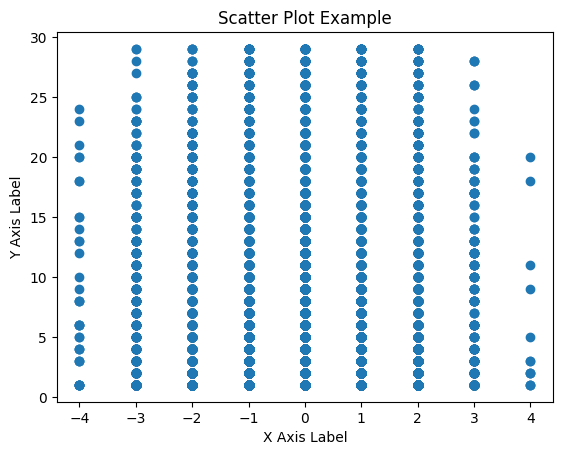

In [52]:
import matplotlib.ticker as mtick

# Create scatter plot
plt.scatter(x_labels, y_labels)

# set y-axis label format to integers
fmt = '%.0f'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Set plot title and axis labels
plt.title('Scatter Plot Example')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Show the plot
plt.show()

## Word Clouds

In [55]:
# We filter only the negative tweets
df_negative_tweets = dataset_2020[dataset_2020['Scale_Sentiment'].isin([-2, -3, -4])]

In [56]:
df_negative_tweets

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Scale_Sentiment,Binary_Sentiment,Dual_Sentiment,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
17,2020-03-11 02:28:00,Call your Reps and Senators and Demand a rapid...,call your reps senators demand a rapid increas...,-2,-1,"(1, -3)",0,0,0
24,2020-03-11 02:58:00,#StopLargeGatherings\n#WorkFromHome \n#CloseTh...,stoplargegatherings workfromhome closetheschoo...,-2,-1,"(1, -3)",2,0,0
25,2020-03-11 03:02:00,Do not stay #broke. Let us help #you start a #...,do not stay broke let us help you start a newl...,-2,-1,"(1, -3)",0,0,0
43,2020-03-11 08:02:00,The financial services company I work for has ...,financial services company i work for has told...,-2,-1,"(1, -3)",0,0,0
67,2020-03-11 11:24:00,Everyone is worried about the coronavirus and ...,everyone is worried about coronavirus im just ...,-2,-1,"(2, -4)",1,0,0
...,...,...,...,...,...,...,...,...,...
30161,2020-06-22 00:00:00,#WWDC2020 iOS What is this? Work from home re...,wwdc2020 ios what is this work from home reall...,-4,-1,"(1, -5)",21,1,0
30199,2020-06-23 00:00:00,More than two-thirds of recent home buyers wer...,more than twothirds recent home buyers were no...,-2,-1,"(1, -3)",0,0,0
30214,2020-06-23 00:00:00,They fucked up letting me work from home now I...,they fucked up letting me work from home now i...,-2,-1,"(1, -3)",14,0,0
30228,2020-06-23 00:00:00,"J. R. Tietsort, CISO Americas, — ""Through the ...",j r tietsort ciso americas through crisis we l...,-2,-1,"(1, -3)",3,1,0


In [57]:
all_negative_tweets = df_negative_tweets['Cleaned_Tweet'].str.cat(sep=' ')

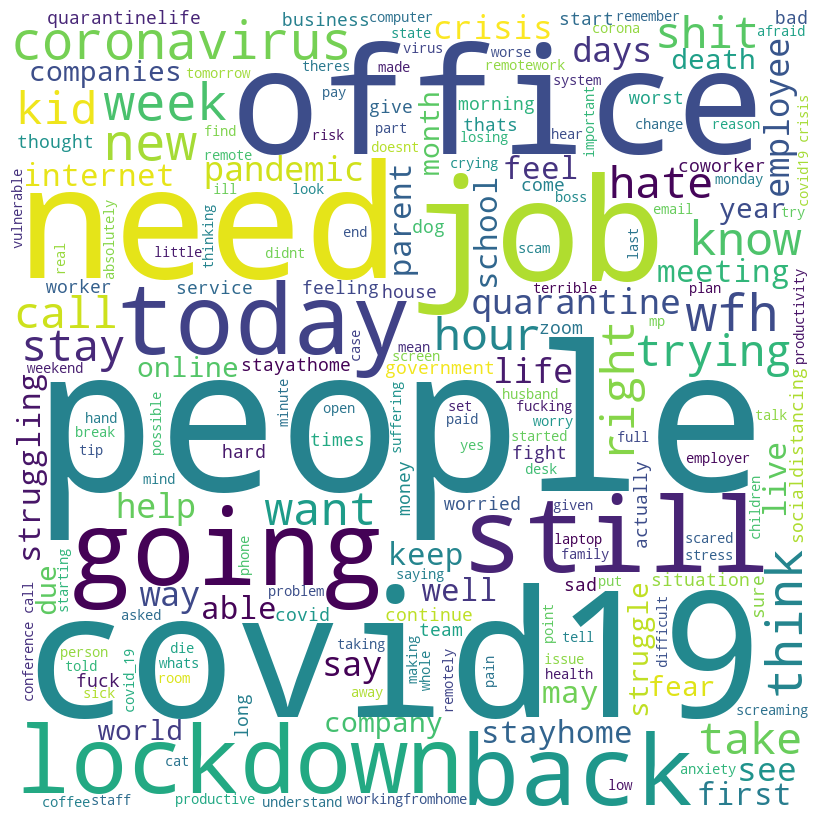

In [68]:
stopwords_cloud = custom_stop_words(os.path.join(root_dir,'stopwords_wordcloud.txt'))
# Create the word cloud object
wordcl = wordcloud.WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_cloud, min_font_size=10).generate(all_negative_tweets)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcl)
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig(os.path.join(folder_path, f'Wordcloud_Negative.png'))

# Show the plot
# plt.show()


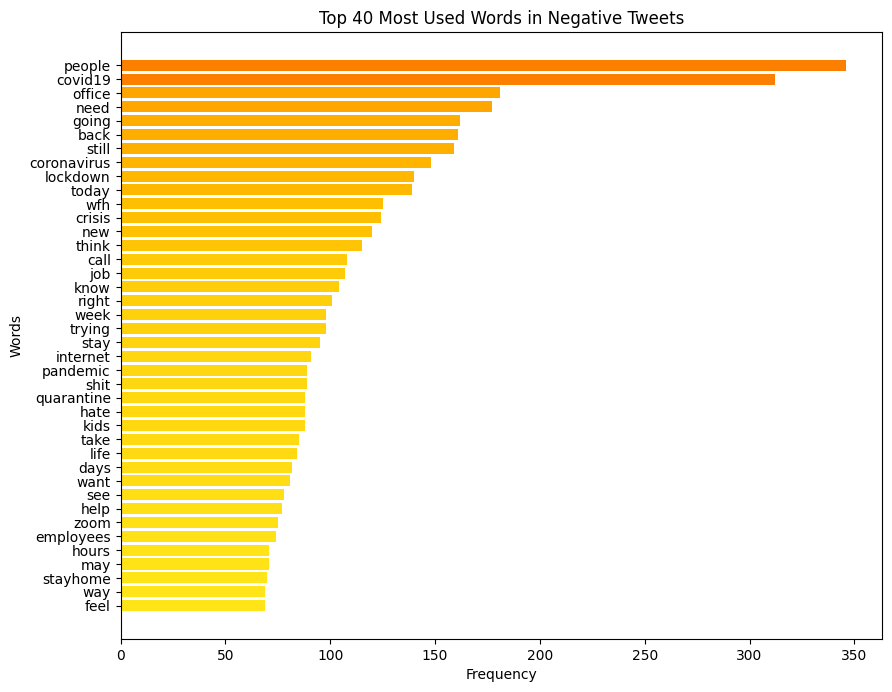

In [127]:
stopwords_cloud = custom_stop_words(os.path.join(root_dir,'stopwords_wordcloud.txt'))
all_negative_tweets = remove_stopwords(all_negative_tweets, stopwords_cloud)

# Tokenize the string into words
words = word_tokenize(all_negative_tweets)

# Calculate word frequency  
frequency_dist = FreqDist(words)

# Select the top 10 most frequent words
top_words = frequency_dist.most_common(40)

# Extract the word and frequency for plotting
word_labels = [word[0] for word in top_words]
word_counts = [word[1] for word in top_words]

# Sort words based on frequency in descending order
word_labels, word_counts = zip(*sorted(zip(word_labels, word_counts), key=lambda x: x[1], reverse=False))

# Create a gradient color map
cmap = plt.get_cmap('Wistia')

# Plot the distribution as a horizontal bar plot with gradient colors
plt.figure(figsize=(9, 7))
plt.barh(word_labels, word_counts, color=cmap(word_counts))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 40 Most Used Words in Negative Tweets')
plt.tight_layout()

plt.savefig(os.path.join(folder_path, f'Top40_Negative_Words.png'))

plt.show()


In [69]:
# We filter only the positive tweets
df_positive_tweets = dataset_2020[dataset_2020['Scale_Sentiment'].isin([2, 3, 4])]

In [70]:
all_positive_tweets = df_positive_tweets['Cleaned_Tweet'].str.cat(sep=' ')

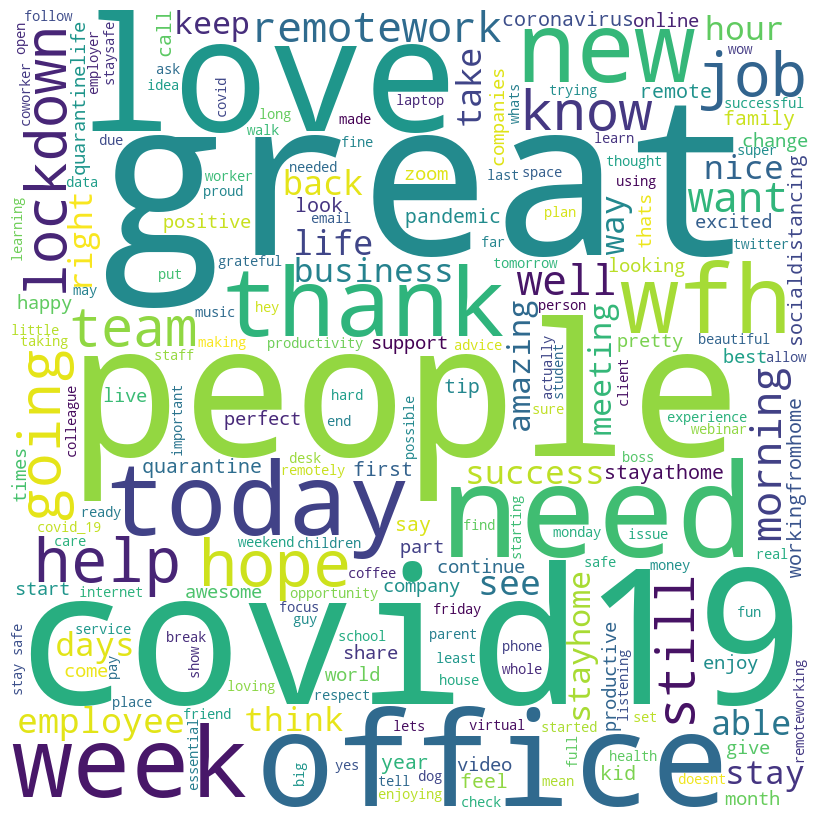

In [71]:
stopwords_cloud = custom_stop_words(os.path.join(root_dir,'stopwords_wordcloud.txt'))
# Create the word cloud object
wordcl = wordcloud.WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_cloud, min_font_size=10).generate(all_positive_tweets)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcl)
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig(os.path.join(folder_path, f'Wordcloud_Positive.png'))

# Show the plot
# plt.show()

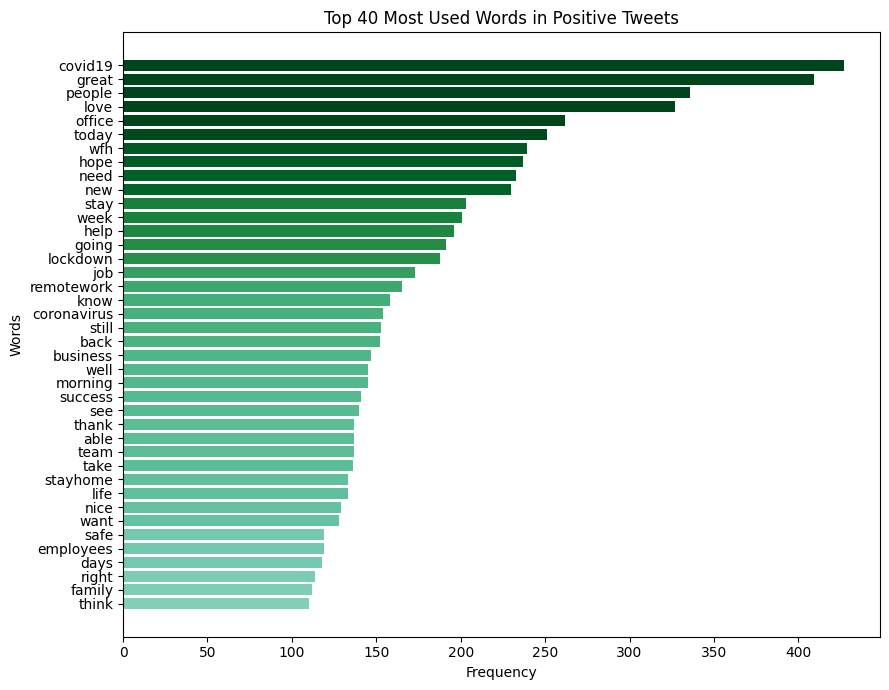

In [108]:
stopwords_cloud = custom_stop_words(os.path.join(root_dir,'stopwords_wordcloud.txt'))
all_positive_tweets = remove_stopwords(all_positive_tweets, stopwords_cloud)

# Tokenize the string into words
words = word_tokenize(all_positive_tweets)

# Calculate word frequency  
frequency_dist = FreqDist(words)

# Select the top 10 most frequent words
top_words = frequency_dist.most_common(40)

# Extract the word and frequency for plotting
word_labels = [word[0] for word in top_words]
word_counts = [word[1] for word in top_words]

# Sort words based on frequency in descending order
word_labels, word_counts = zip(*sorted(zip(word_labels, word_counts), key=lambda x: x[1], reverse=False))

# Create a gradient color map
cmap = plt.get_cmap('BuGn')

# Plot the distribution as a horizontal bar plot with gradient colors
plt.figure(figsize=(9, 7))
plt.barh(word_labels, word_counts, color=cmap(word_counts))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 40 Most Used Words in Positive Tweets')
plt.tight_layout()

plt.savefig(os.path.join(folder_path, f'Top40_Positive_Words.png'))

#plt.show()


### Computing the Dual_Differences to examine the posts with neutral Scale_Sentiment scores

In [151]:
# Compute the difference between the positive score and the negative one from Dual_Sentiment column
dataset_2020['Dual_Difference'] = dataset_2020['Dual_Sentiment'].apply(lambda x: x[0] - x[1])

# Print the updated dataframe
dataset_2020

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Scale_Sentiment,Binary_Sentiment,Dual_Sentiment,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Dual_Difference
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,is union able take measures in getting deal wi...,1,1,"(2, -1)",0,0,0,3
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,im looking forward working from home a lot bec...,0,1,"(2, -2)",0,0,0,4
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,china team work from home more than 1 month al...,0,1,"(1, -1)",0,0,0,2
3,2020-03-11 00:39:00,We are about to find out how much work could h...,we are about find out how much work could have...,1,1,"(2, -1)",363,28,14,3
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,folks who cant workfromhome probably hate this...,-1,-1,"(3, -4)",1,0,0,7
...,...,...,...,...,...,...,...,...,...,...
30227,2020-06-23 00:00:00,"Sirs please help, unable to work despite bel...",sirs please help unable work despite believing...,2,1,"(3, -1)",0,0,0,4
30228,2020-06-23 00:00:00,"J. R. Tietsort, CISO Americas, — ""Through the ...",j r tietsort ciso americas through crisis we l...,-2,-1,"(1, -3)",3,1,0,4
30229,2020-06-23 00:00:00,Sell your own products and servicesYou'll have...,sell your own products servicesyoull have full...,0,1,"(1, -1)",3,0,0,2
30230,2020-06-23 00:00:00,Zoom Alternatives For Remote Meetings And Vid...,zoom alternatives for remote meetings video ca...,0,1,"(1, -1)",1,0,0,2


In [156]:
# Define the desired Dual_Difference values
desired_values = [2, 4, 6, 8]

# Calculate the percentage for each Dual_Difference value
percentages = []
for value in desired_values:
    filtered_df = dataset_2020[(dataset_2020['Scale_Sentiment'] == 0) & (dataset_2020['Dual_Difference'] == value)]
    percentage = len(filtered_df) / len(dataset_2020) * 100
    percentages.append(percentage)

# Print the percentages
for i, value in enumerate(desired_values):
    print(f"The percentage of posts with Scale_Sentiment 0 and Dual_Difference {value} is: {percentages[i]}%")

The percentage of posts with Scale_Sentiment 0 and Dual_Difference 2 is: 33.2296903942842%
The percentage of posts with Scale_Sentiment 0 and Dual_Difference 4 is: 6.68496956866896%
The percentage of posts with Scale_Sentiment 0 and Dual_Difference 6 is: 1.9978830378406987%
The percentage of posts with Scale_Sentiment 0 and Dual_Difference 8 is: 0.10254035459116168%


In [153]:
dataset_2020.to_csv('dataset_2020.csv', index=False)

## Post-pandemics analysis: Tweets from April 1st to June 30th, 2022

In [ ]:
dataset_2022 = pd.read_csv('Tweets_2022_1-April_30-June_ALL.csv')

In [ ]:
dataset_2022.head()

In [ ]:
dataset_2022['Author_Name'] = dataset_2022['Author_Web_Page_URL'].apply(lambda x: '@' + re.findall(r'https://twitter.com/(\w+)', x)[0])

In [ ]:
# Drop the unnecessary columns from the dataset
dataset_2022.drop(['Category','Keyword', 'Web_Page_URL', 'Tweet_Image_URL', 'Comment_Image_URL'], axis=1, inplace=True)

In [ ]:
dataset_2022[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]] = dataset_2022[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]].fillna(0)

In [ ]:
dataset_2022

In [ ]:
dataset_2022['Tweet_Number_of_Likes'] = pd.to_numeric(dataset_2022['Tweet_Number_of_Likes'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
dataset_2022['Tweet_Number_of_Retweets'] = pd.to_numeric(dataset_2022['Tweet_Number_of_Retweets'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
dataset_2022['Tweet_Number_of_Reviews'] = pd.to_numeric(dataset_2022['Tweet_Number_of_Reviews'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')

In [ ]:
dataset_2022['Tweet_Timestamp'] = pd.to_datetime(dataset_2022['Tweet_Timestamp'], format='%d-%b-%y')

In [ ]:
# Add columns with cleaned text for Tweets and Comments
dataset_2022.insert(dataset_2022.columns.get_loc('Tweet_Content')+1, 'Cleaned_Tweet', dataset_2022['Tweet_Content'].apply(lambda x: clean_text(x, stopwords)))
dataset_2022.insert(dataset_2022.columns.get_loc('Comment_Content')+1, 'Cleaned_Comment', dataset_2022['Comment_Content'].apply(lambda x: clean_text(x, stopwords)))

In [ ]:
dataset_2022

In [ ]:
# Add sentiment columns for Source Tweets
add_sentiment_columns(dataset_2022, compute_sentiment_scores(dataset_2022))

In [ ]:
# Calculate sentiment scores for Comments
comment_scale_sentiments = pd.Series()
for index, cleaned_text in dataset_2022['Cleaned_Comment'].items():
    if(cleaned_text != ''):
        comment_scale_sentiments.loc[index] = senti.getSentiment(cleaned_text)[0]
    else:
        comment_scale_sentiments.loc[index] = ''
    
    # print(index)


In [ ]:
comment_scale_sentiments

In [ ]:
comment_scale_sentiments.to_csv('comment_scale_sentiments.csv', index=False)

In [ ]:
# comment_scale_sentiments = [ senti.getSentiment(cleaned_text)[0] if cleaned_text != '' else '#' 
#                             for cleaned_text in raw_dataset_2022['Cleaned_Comment'] ]

In [ ]:
dataset_2022.insert(dataset_2022.columns.get_loc('Cleaned_Comment')+1, 'Comment_Scale_Sentiment', value=comment_scale_sentiments)

In [ ]:
dataset_2022